In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pickle

plt.style.use('./../../paper.mplstyle')

In [2]:
# ! bash memScrape.sh

In [2]:
n = 50
full = np.loadtxt('summary.txt', skiprows=1, max_rows=n, dtype='str')
split = np.loadtxt('summary.txt', skiprows=n+2, max_rows=n, dtype='str')
wrap = np.loadtxt('summary.txt', skiprows=2*n+3, max_rows=n, dtype='str')

In [3]:
full_mem = [float(f) for f in full[:,2]]
split_mem = [float(f) for f in split[:,2]]
wrap_mem = [float(f) for f in wrap[:,2]]

In [4]:
full_t = [datetime.timedelta(hours=int(d.split(':')[0]), minutes=int(d.split(':')[1]),
                    seconds=int(d.split(':')[2])).seconds for d in full[:,3]]
split_t = [datetime.timedelta(hours=int(d.split(':')[0]), minutes=int(d.split(':')[1]),
                    seconds=int(d.split(':')[2])).seconds for d in split[:,3]]
wrap_t = [datetime.timedelta(hours=int(d.split(':')[0]), minutes=int(d.split(':')[1]),
                    seconds=int(d.split(':')[2])).seconds for d in wrap[:,3]]

/tmp/ipykernel_15148/3329710899.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('wrapTestCompute.png', dpi=200)
/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


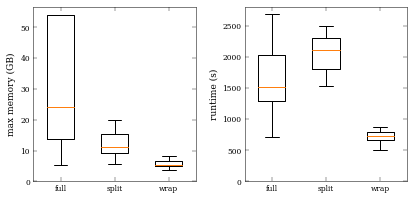

In [41]:
f, a = plt.subplots(1,2, figsize=(3.35*2,2.79*1.15), gridspec_kw={'wspace':0.3})
a[0].boxplot([full_mem, split_mem, wrap_mem], labels=['full', 'split','wrap'], widths=0.5)
a[0].set_ylabel('max memory (GB)')
a[0].set_ylim(ymin=0)

a[1].boxplot([full_t, split_t, wrap_t], labels=['full', 'split','wrap'], widths=0.5, showfliers=False)
a[1].set_ylabel('runtime (s)')
a[1].set_ylim(ymin=0);

plt.savefig('wrapTestCompute.png', dpi=200)

In [6]:
seeds = [int(s) for s in full[:,1]]

def getResults(sim):
    results = {k:[] for k in ['e', 'e1', 'e2', 'sigma', 'dx', 'dy', 'vare1', 'vare2']}
    for s in seeds:
        path = '/home/groups/burchat/chebert/'
        d = pickle.load(open(path + f'{sim}{s}.p', 'rb'))
        for k in ['e1','e2', 'sigma']:
            results[k].append(np.mean(d[k]))
        for k, l in zip(['dx','dy'],['x','y']):
            results[k].append((25.5-np.mean(d[l]))*0.2)
        for k, l in zip(['vare1', 'vare2'],['e1','e2']):
            results[k].append(np.std(d[l]))
        results['e'].append(np.hypot(d['e1'], d['e2']).mean())
    return results
    
full_result = getResults('full')
split_result = getResults('split')
wrap_result = getResults('wrap')

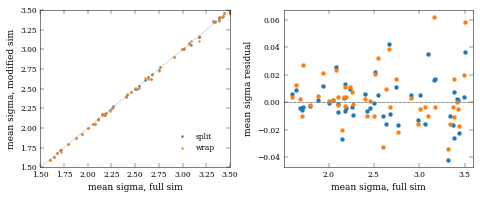

In [7]:
f, a = plt.subplots(1,2,figsize=(3.35*2,2.79*1))
a[0].plot([0,10],[0,10], color='lightgrey')
[a[0].plot(full_result['sigma'], res['sigma'], '.', label=label)
 for res, label in zip([split_result, wrap_result], ['split', 'wrap'])]
[a[1].plot(full_result['sigma'], np.array(full_result['sigma']) - np.array(res['sigma']), 'o', label=label)
 for res, label in zip([split_result, wrap_result], ['split', 'wrap'])]
a[0].set_ylabel('mean sigma, modified sim')
a[1].set_ylabel('mean sigma residual')
a[0].set_xlabel('mean sigma, full sim')
a[1].set_xlabel('mean sigma, full sim')
a[1].axhline(0, linestyle='--', color='grey')
a[0].set_ylim([1.5,3.5])
a[0].set_xlim([1.5,3.5])
a[0].legend(loc=4);
plt.show()

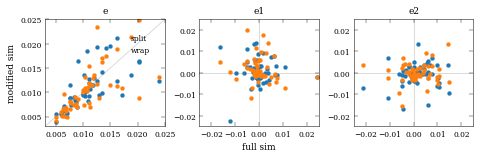

In [8]:
f, a = plt.subplots(1, 3, figsize=(3.35*2,2.79*0.8))
a[0].plot([0,.25],[0,.25], color='lightgrey')
[a[0].plot(full_result['e'], res['e'], 'o', label=label)
 for res, label in zip([split_result, wrap_result], ['split', 'wrap'])]
a[0].set_ylabel('modified sim')
a[0].set_ylim([0.003,.025])
a[0].set_xlim([0.003,.025])
a[0].set_title('e')
a[0].legend()

[ax.axhline(0,color='lightgrey') for ax in a[1:]]
[ax.axvline(0,color='lightgrey') for ax in a[1:]]
[ax.set_ylim([-.025,.025]) for ax in a[1:]]
[ax.set_xlim([-.025,.025]) for ax in a[1:]]

[a[1].plot(full_result['e1'], res['e1'], 'o', label=label)
 for res, label in zip([split_result, wrap_result], ['split', 'wrap'])]
a[1].set_xlabel('full sim')
a[1].set_title('e1')


[a[2].plot(full_result['e2'], res['e2'], 'o', label=label)
 for res, label in zip([split_result, wrap_result], ['split', 'wrap'])]
a[2].set_title('e2')

plt.show()

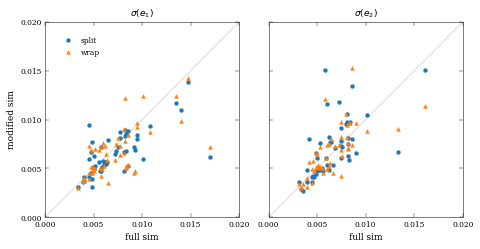

In [42]:
f, a = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(3.35*2,2.79*1.25))
a[0].plot([0,.25],[0,.25], color='lightgrey')
[a[0].plot(full_result['vare1'], res['vare1'], s, label=label)
 for res, label, s in zip([split_result, wrap_result], ['split', 'wrap'], ['o', '^'])]
a[0].set_ylabel('modified sim')
a[0].set_xlabel('full sim')
a[0].set_ylim([0,.02])
a[0].set_xlim([0,.02])
a[0].set_yticks([0,.005,.01,.015,.02])
a[0].set_xticks([0,.005,.01,.015,.02])
a[0].legend(loc=2)
a[0].set_title(r'$\sigma(e_1)$')

a[1].plot([0,.25],[0,.25], color='lightgrey')
[a[1].plot(full_result['vare2'], res['vare2'], s, label=label)
 for res, label, s in zip([split_result, wrap_result], ['split', 'wrap'], ['o', '^'])]
a[1].set_xlabel('full sim')
a[1].set_title(r'$\sigma(e_2)$')

plt.savefig('wrapTestEllVar.png', dpi=200)
plt.show()

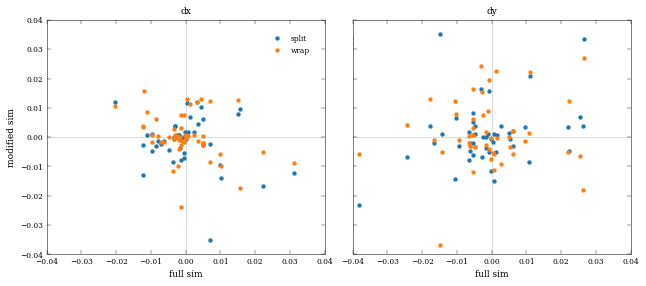

In [10]:
f, a = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,4))

[ax.axhline(0,color='lightgrey') for ax in a]
[ax.axvline(0,color='lightgrey') for ax in a]

[a[0].plot(full_result['dx'], res['dx'], 'o', label=label)
 for res, label in zip([split_result, wrap_result], ['split', 'wrap'])]
a[0].set_ylabel('modified sim')
a[0].set_xlabel('full sim')
a[0].set_ylim([-0.04,.04])
a[0].set_xlim([-0.04,.04])
a[0].legend()
a[0].set_title('dx')

[a[1].plot(full_result['dy'], res['dy'], 'o', label=label)
 for res, label in zip([split_result, wrap_result], ['split', 'wrap'])]
a[1].set_xlabel('full sim')
a[1].set_title('dy')

plt.show()

### pcf directions

In [11]:
import polarSumStats as pss

def getPcfDirs(sim):
    results = {k:[] for k in ['e1', 'e2', 'sigma']}
    for s in seeds:
        path = '/home/groups/burchat/chebert/'
        d = pickle.load(open(path + f'{sim}{s}.p', 'rb'))
        for k in ['e1','e2', 'sigma']:
            thx, thy = np.array(d['thx']), np.array(d['thy'])
            if k == 'sigma': 
                p = d['sigma'] - np.mean(d['sigma'])
            else:
                p = d[k]
            pcf = pss.comp2pcfTreecorr(thx, thy, p, 'big')
            polar = pss.get2pcfPolar(pcf)
            
            kkAnnulus = pss.get2pcfAnnulus(polar, 1.75, 0.25)
            s, bins = pss.getHistogram(kkAnnulus, 30)
            maximum = bins[np.argmax(s)]
            results[k].append(maximum)
    bins = list(bins[bins>=0]) + list(bins[bins<0]%180)
    return results, bins

full_dirs = getPcfDirs('full')
split_dirs = getPcfDirs('split')
wrap_dirs = getPcfDirs('wrap')

[pickle.dump(f, open(f'../wraptestdirs_{k}.p','wb')) 
 for f,k in zip([full_dirs, split_dirs, wrap_dirs], ['full', 'split','wrap'])]

[None, None, None]

In [27]:
full_dirs = pickle.load(open('../wraptestdirs_full.p', 'rb'))
split_dirs = pickle.load(open('../wraptestdirs_split.p', 'rb'))
wrap_dirs = pickle.load(open('../wraptestdirs_wrap.p', 'rb'))

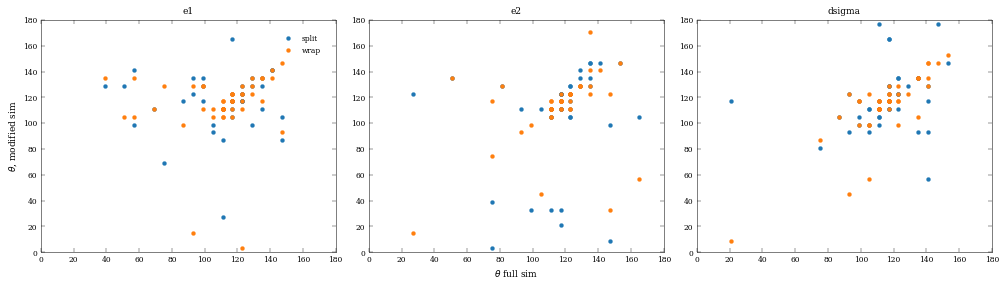

In [12]:
f, a = plt.subplots(1, 3, figsize=(14,4))

[a[0].plot(np.array(full_dirs[0]['e1'])%180, np.array(res[0]['e1'])%180, 'o', label=label) 
 for res, label in zip([split_dirs, wrap_dirs], ['split', 'wrap'])]
[a[1].plot(np.array(full_dirs[0]['e2'])%180, np.array(res[0]['e2'])%180, 'o') 
 for res in [split_dirs, wrap_dirs]]
[a[2].plot(np.array(full_dirs[0]['sigma'])%180, np.array(res[0]['sigma'])%180, 'o') 
 for res in [split_dirs, wrap_dirs]]

[ax.set_title(l) for ax, l in zip(a,['e1','e2','dsigma'])]
a[0].set_ylabel(r'$\theta$, modified sim')
a[1].set_xlabel(r'$\theta$ full sim')

[ax.set_ylim([0,180]) for ax in a]
[ax.set_xlim([0,180]) for ax in a]

a[0].legend();

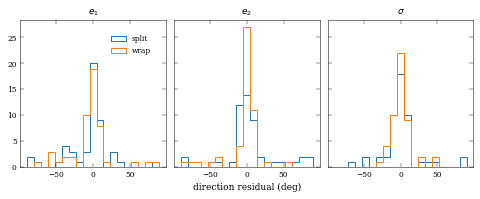

In [43]:
f, a = plt.subplots(1, 3, sharey=True, figsize=(3.35*2,2.79*1))

bins = np.linspace(-90,90, 20)

[a[0].hist((np.array(full_dirs[0]['e1']) - np.array(res[0]['e1']) + 90)%180 - 90, bins, histtype='step', label=label) 
 for res, label in zip([split_dirs, wrap_dirs], ['split', 'wrap'])]

[a[1].hist((np.array(full_dirs[0]['e2']) - np.array(res[0]['e2']) + 90)%180 - 90, bins, histtype='step') 
 for res in [split_dirs, wrap_dirs]]

[a[2].hist((np.array(full_dirs[0]['sigma']) - np.array(res[0]['sigma']) + 90)%180 - 90, bins, histtype='step') 
 for res in [split_dirs, wrap_dirs]]

a[1].set_xlabel('direction residual (deg)')
[ax.set_title(l) for ax, l in zip(a,[r'$e_1$',r'$e_2$',r'$\sigma$'])]
a[0].legend()

plt.savefig('wrapTestPcfDirs.png', dpi=200);

### next: plot just split v wrap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


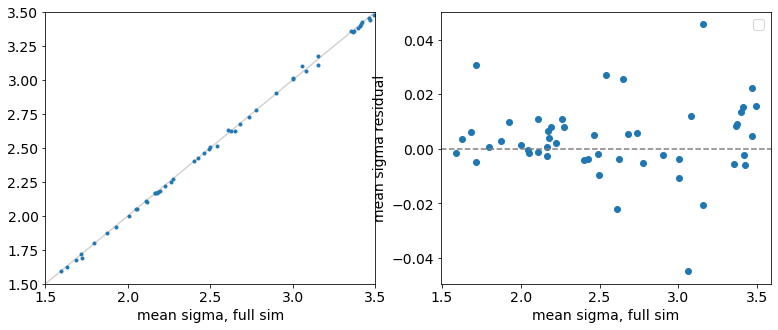

In [16]:
f, a = plt.subplots(1,2,figsize=(13,5))
a[0].plot([0,10],[0,10], color='lightgrey')
a[0].plot(split_result['sigma'], wrap_result['sigma'], '.')
a[1].plot(split_result['sigma'], np.array(split_result['sigma']) - np.array(wrap_result['sigma']), 'o')
a[1].set_ylabel('mean sigma residual')
a[0].set_xlabel('mean sigma, full sim')
a[1].set_xlabel('mean sigma, full sim')
a[1].axhline(0, linestyle='--', color='grey')
a[0].set_ylim([1.5,3.5])
a[0].set_xlim([1.5,3.5])
# plt.legend();
plt.show()

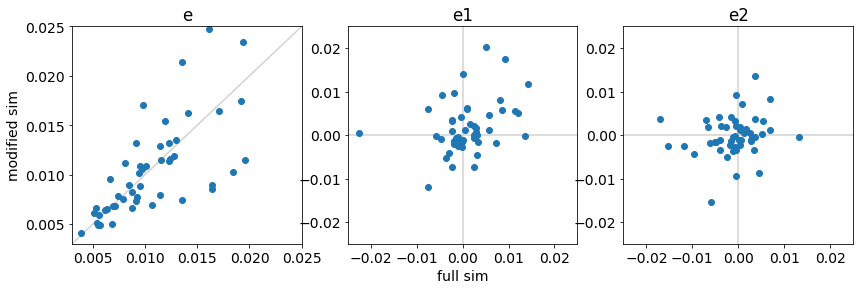

In [15]:
f, a = plt.subplots(1, 3, figsize=(14,4))
a[0].plot([0,.25],[0,.25], color='lightgrey')
a[0].plot(split_result['e'], wrap_result['e'], 'o')
a[0].set_ylabel('modified sim')
a[0].set_ylim([0.003,.025])
a[0].set_xlim([0.003,.025])
a[0].set_title('e')
# a[0].legend()

[ax.axhline(0,color='lightgrey') for ax in a[1:]]
[ax.axvline(0,color='lightgrey') for ax in a[1:]]
[ax.set_ylim([-.025,.025]) for ax in a[1:]]
[ax.set_xlim([-.025,.025]) for ax in a[1:]]

a[1].plot(split_result['e1'], wrap_result['e1'], 'o')
a[1].set_xlabel('full sim')
a[1].set_title('e1')

a[2].plot(split_result['e2'], wrap_result['e2'], 'o')
a[2].set_title('e2')

plt.show()

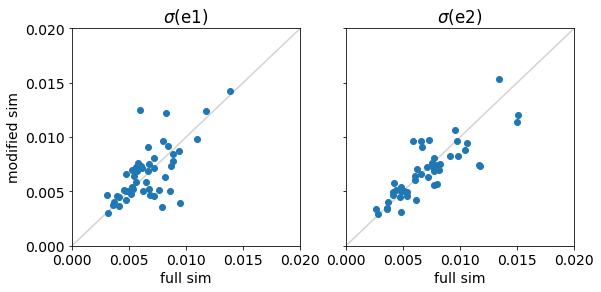

In [18]:
f, a = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,4))
a[0].plot([0,.25],[0,.25], color='lightgrey')
a[0].plot(split_result['vare1'], wrap_result['vare1'], 'o')
a[0].set_ylabel('modified sim')
a[0].set_xlabel('full sim')
a[0].set_ylim([0,.02])
a[0].set_xlim([0,.02])
# a[0].legend()
a[0].set_title(r'$\sigma$(e1)')

a[1].plot([0,.25],[0,.25], color='lightgrey')
a[1].plot(split_result['vare2'], wrap_result['vare2'], 'o')
a[1].set_xlabel('full sim')
a[1].set_title(r'$\sigma$(e2)')

plt.show()

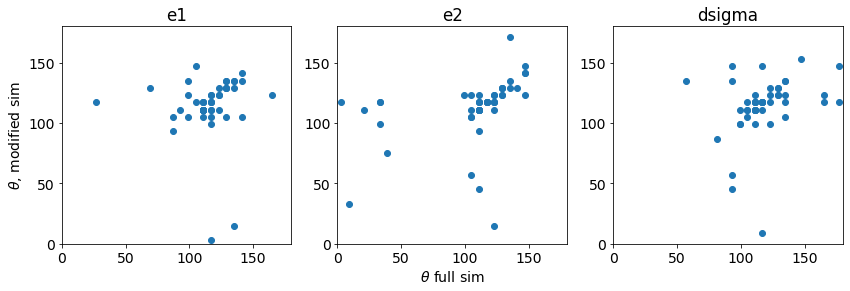

In [23]:
f, a = plt.subplots(1, 3, figsize=(14,4))

a[0].plot(np.array(split_dirs[0]['e1'])%180, np.array(wrap_dirs[0]['e1'])%180, 'o')
a[1].plot(np.array(split_dirs[0]['e2'])%180, np.array(wrap_dirs[0]['e2'])%180, 'o')
a[2].plot(np.array(split_dirs[0]['sigma'])%180, np.array(wrap_dirs[0]['sigma'])%180, 'o')

[ax.set_title(l) for ax, l in zip(a,['e1','e2','dsigma'])]
a[0].set_ylabel(r'$\theta$, modified sim')
a[1].set_xlabel(r'$\theta$ full sim')

[ax.set_ylim([0,180]) for ax in a]
[ax.set_xlim([0,180]) for ax in a];

# a[0].legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


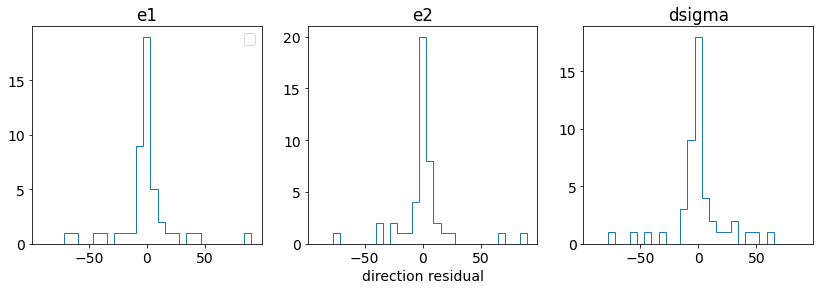

In [24]:
f, a = plt.subplots(1, 3, figsize=(14,4))

bins = np.linspace(-90,90, 30)

a[0].hist(np.array(split_dirs[0]['e1']) - np.array(wrap_dirs[0]['e1']), bins, histtype='step')
a[1].hist(np.array(split_dirs[0]['e2']) - np.array(wrap_dirs[0]['e2']), bins, histtype='step')
a[2].hist(np.array(split_dirs[0]['sigma']) - np.array(wrap_dirs[0]['sigma']), bins, histtype='step')

a[1].set_xlabel('direction residual')
[ax.set_title(l) for ax, l in zip(a,['e1','e2','dsigma'])]
a[0].legend();